In [36]:
# Imports
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
import nltk
import joblib


# file path - this for linux windows you will need "//"
feature = ["permission" , "permission_number", "url_css", "check_css_for_script", "check_css_for_malicious_code", "js_check", 
           "js_url", "total_url", "premission_new","sus", "total_js", "label"]
f_path = "/home/rivka/Desktop/dataset.csv"
df = pd.read_csv(f_path,names= feature, header=None)


df["premission_new"] = df["premission_new"].fillna('null')
column = df['premission_new']
array = column.values
lst = array.tolist()
tokenized_text = [nltk.word_tokenize(sentence.lower()) for sentence in lst]
try_model = open("Word2Vec.pkl","rb")
try_clf = joblib.load(try_model)
new_value = []

for x in tokenized_text:
    new_value.append(try_clf.wv[x].sum())


df["premission_new"] = new_value

X = list(zip(df["permission_number"],df["url_css"], df["check_css_for_script"], df["check_css_for_malicious_code"] 
             ,df["js_check"], df["js_url"],df["total_url"], df["premission_new"]))

# Machine Learning

In [37]:
y = np.stack(df["label"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
clf1 = AdaBoostClassifier(n_estimators=95, random_state=0)
clf1.fit(X, y)
predictions1 = clf1.predict(X_test)

# save machine

In [38]:
model = open("AdaBoostClassifier.pkl","wb")
joblib.dump(clf1,model)
model.close()

# Confusion Matrix

              precision    recall  f1-score   support

           0    1.00000   0.98333   0.99160        60
           1    0.93333   1.00000   0.96552        14

    accuracy                        0.98649        74
   macro avg    0.96667   0.99167   0.97856        74
weighted avg    0.98739   0.98649   0.98666        74



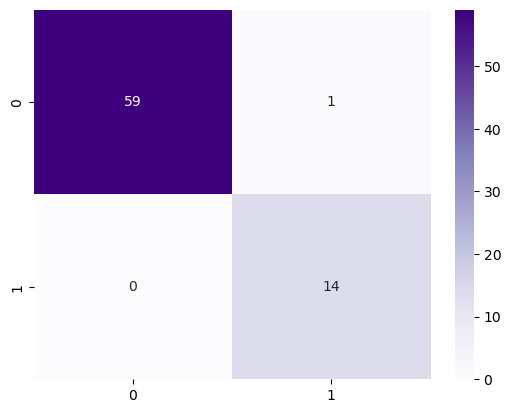

In [39]:
true_labels = y_test
cf_matrix = confusion_matrix(true_labels, predictions1)
clf_report = classification_report(true_labels, predictions1, digits=5)
heatmap = sns.heatmap(cf_matrix, annot=True, cmap='Purples', fmt='g', 
                      xticklabels=np.unique(true_labels), 
                      yticklabels=np.unique(true_labels)) 

print(clf_report)